<h2 align=center> Facial Expression Recognition</h2>

### Task 1: Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
print("OK")

Tensorflow version: 2.2.0
OK


### Task 2: Plot Sample Images

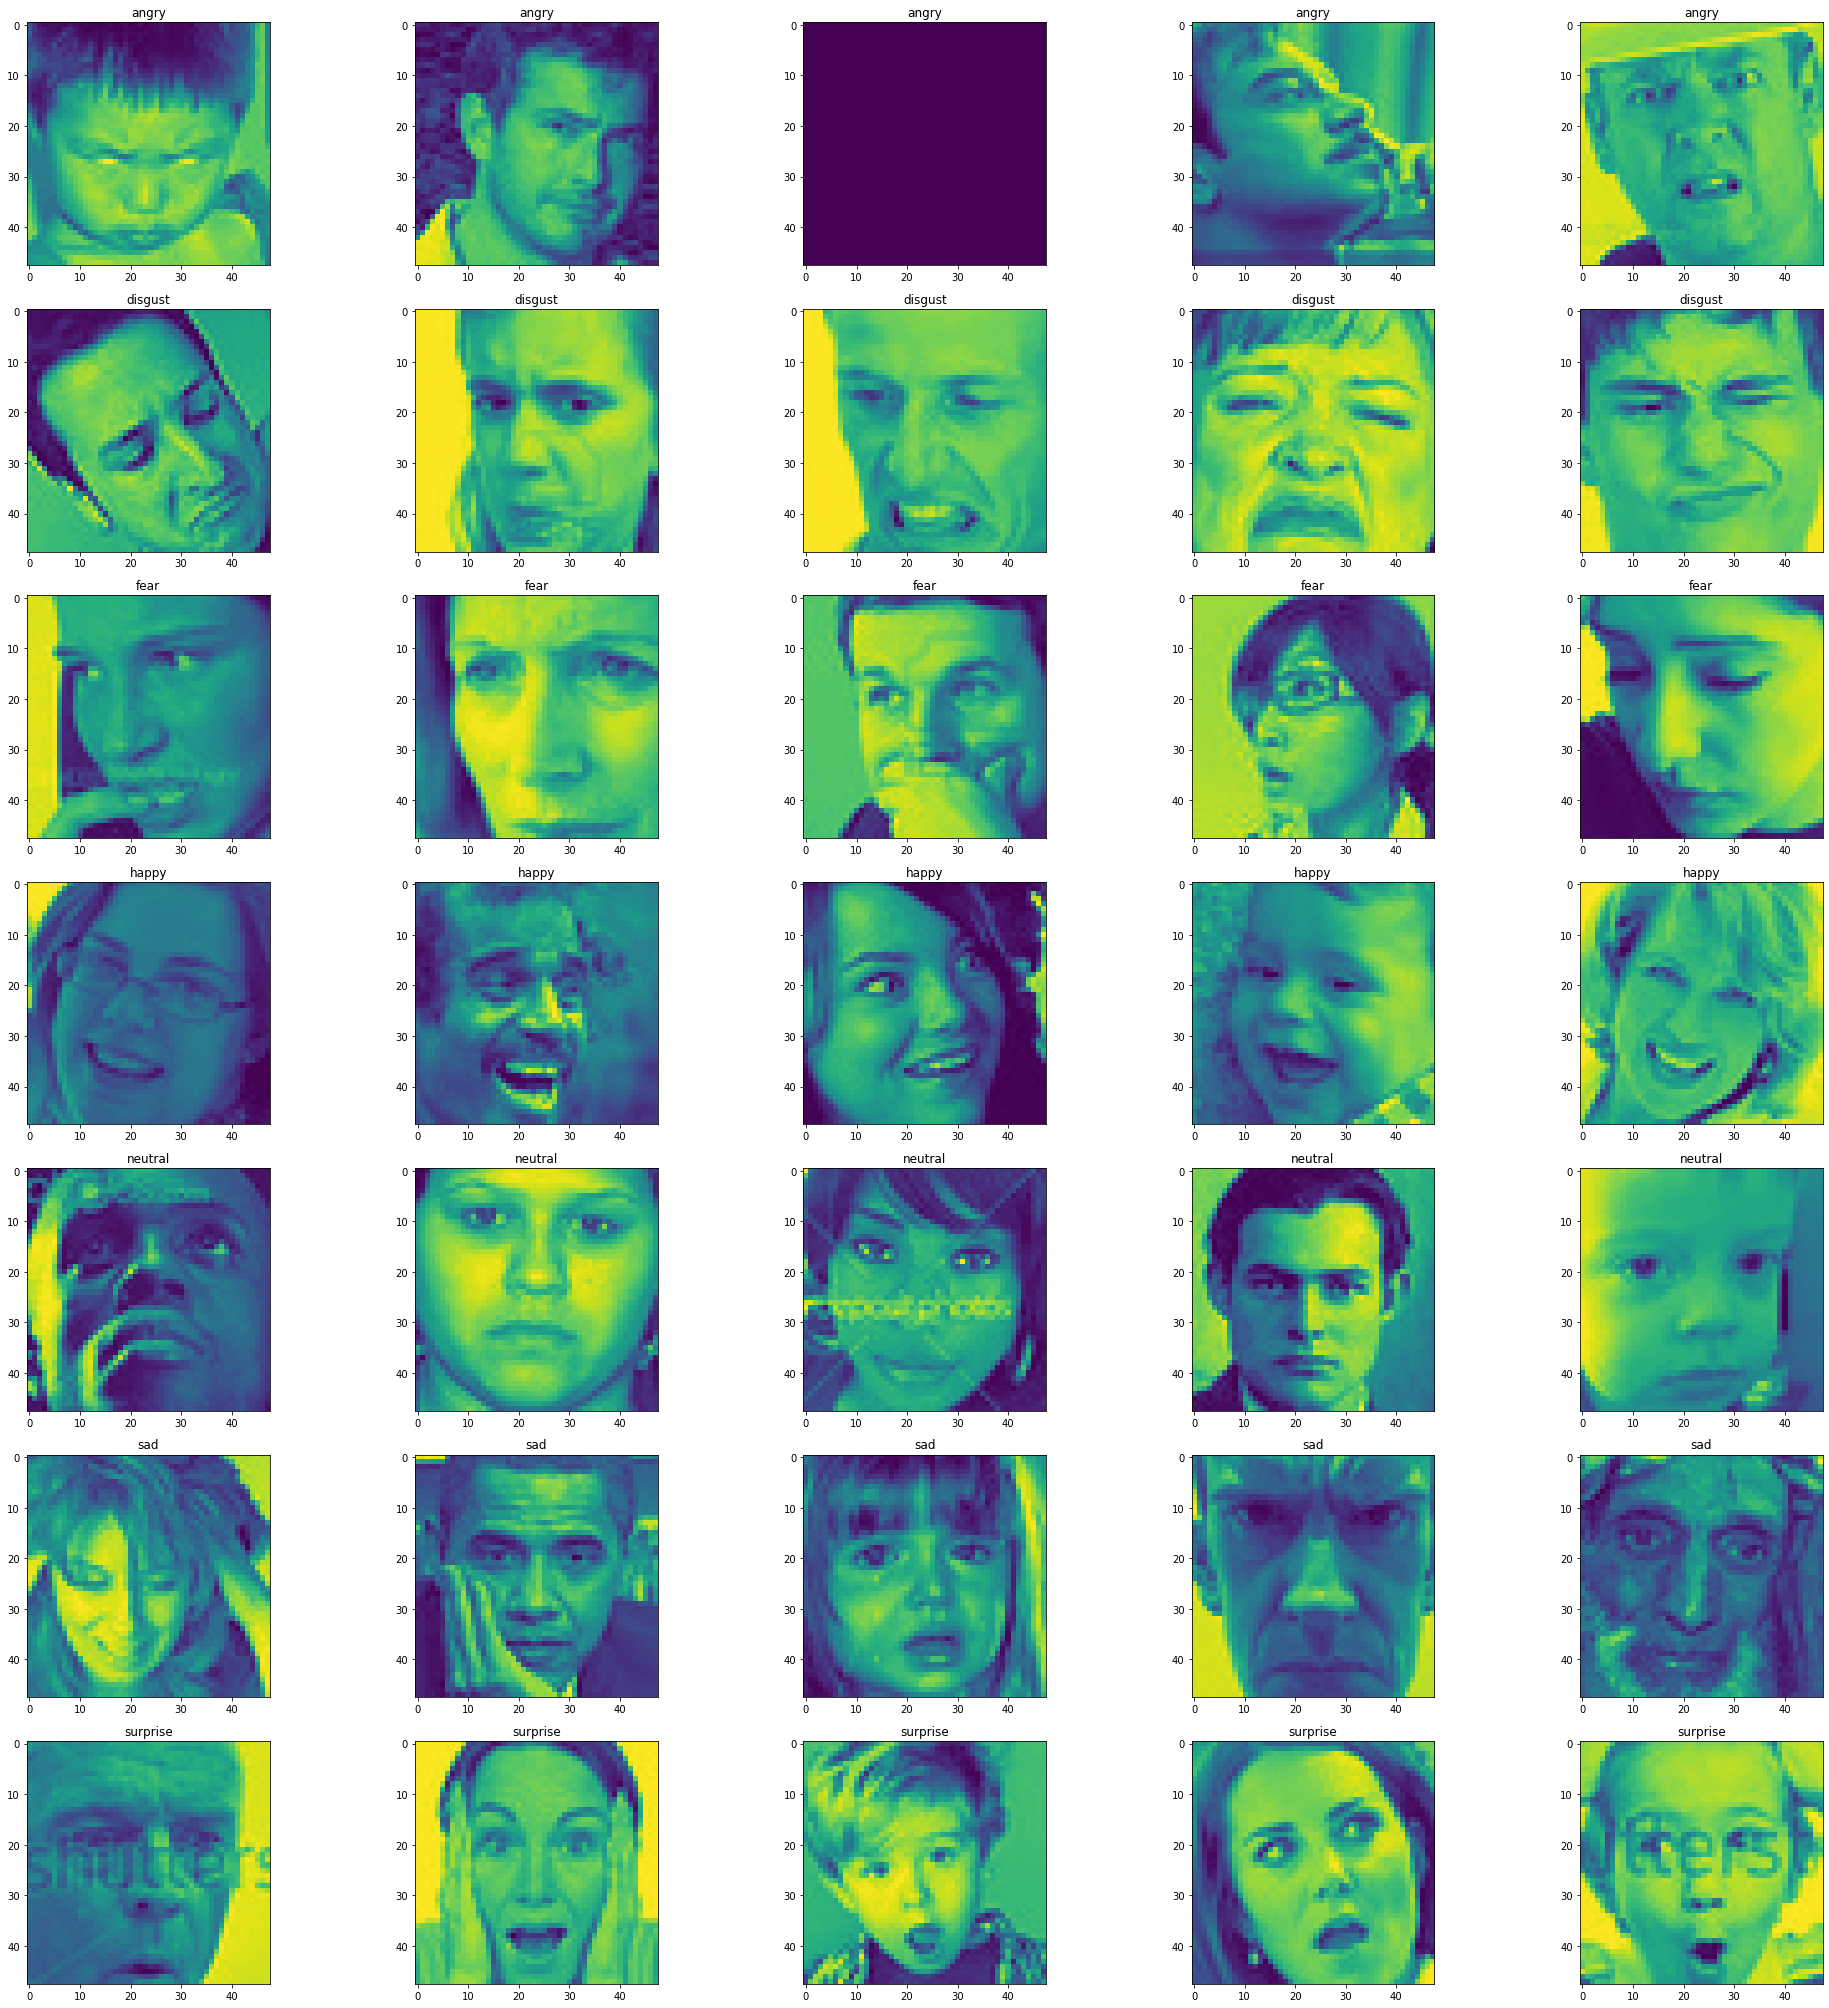

In [2]:
import PIL
fig, axs = plt.subplots(7,5, figsize=(28,28))
count = 0
for i in os.listdir('./train'):
  # get the list of images in the particualr class
  train_class = os.listdir(os.path.join('train',i))
  #plot 5 images per class
  for j in range(5):
    img = os.path.join('train',i,train_class[j])    
    img = PIL.Image.open(img)
#     add a line to show in grayscale mode
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)
   
  count += 1

fig.tight_layout()

# import os
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# def plot_example_images(plt):
#     img_size = 48
#     plt.figure(0, figsize=(12,20))
#     ctr = 0

#     for expression in os.listdir("train/"):
#         for i in range(1,6):
#             ctr += 1
#             plt.subplot(7,5,ctr)
#             img = load_img("train/" + expression + "/" +os.listdir("train/" + expression)[i], target_size=(img_size, img_size))
#             plt.imshow(img, cmap="gray")

#     plt.tight_layout()
#     return plt


In [3]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7214 happy images
4965 neutral images
4830 sad images
3171 surprise images


### Task 3: Generate Training and Validation Batches

In [4]:
img_size = 48
batch_size = 32

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True
                                                   )

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)


Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Task 4: Create CNN Model

In [5]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,kernel_size=(3, 3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolution layer
model.add(Conv2D(256,kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Fully connected layer 2nd layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 128)       0

 # Details on non-trainavble parameters

# callbacks details


### Task 6: Train and Evaluate Model

In [8]:

epochs = 15

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=2, min_lr=0.00001, mode='auto')

# callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
   x=train_generator,
   steps_per_epoch=steps_per_epoch,
   epochs=epochs,
   validation_data = validation_generator,
   validation_steps=validation_steps,
   # callbacks=callbacks 
)


Epoch 1/15
897/897 [==============================] - 800s 891ms/step - loss: 1.6484 - accuracy: 0.3454 - val_loss: 1.6440 - val_accuracy: 0.3652
Epoch 2/15
897/897 [==============================] - 142s 158ms/step - loss: 1.3530 - accuracy: 0.4819 - val_loss: 1.3941 - val_accuracy: 0.4562
Epoch 3/15
897/897 [==============================] - 142s 158ms/step - loss: 1.2288 - accuracy: 0.5343 - val_loss: 1.2808 - val_accuracy: 0.5068
Epoch 4/15
897/897 [==============================] - 142s 158ms/step - loss: 1.1596 - accuracy: 0.5614 - val_loss: 1.2350 - val_accuracy: 0.5311
Epoch 5/15
897/897 [==============================] - 141s 158ms/step - loss: 1.1021 - accuracy: 0.5828 - val_loss: 1.2046 - val_accuracy: 0.5424
Epoch 6/15
897/897 [==============================] - 141s 157ms/step - loss: 1.0607 - accuracy: 0.5985 - val_loss: 1.0702 - val_accuracy: 0.5975
Epoch 7/15
897/897 [==============================] - 141s 157ms/step - loss: 1.0181 - accuracy: 0.6146 - val_loss: 1.1193 -

NameError: name 'classifier' is not defined

### Task 7: Represent Model as JSON String

In [9]:
model.save('weights.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)